bagian ini untuk import paket yang diperlukan

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prettytable import PrettyTable

ini untuk ngecek versi (ga disuruh)

In [97]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)


Numpy version: 1.21.3
Pandas version: 1.4.3


membaca dataset dan menginisialisasi namanya, untuk driver standing = driver, untuk drivers = drivers.

In [98]:
driver = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


1. Data Cleaning (Handling missing value

saya melakukan pengecekan dan hasilnya tidak ada hasil yang hilang aka nilainya 0 semua (aman ygy)

In [99]:
driver.isnull().sum()

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [100]:
drivers.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

1. Data Cleaning (Handling duplicate value)

mengecek apakah ada data yang duplikat, dan tidak ada (aman ygy)

In [101]:
duplicate = driver.duplicated().sum()
duplicate1 = drivers.duplicated().sum()
print('jumlah nilai duplikat pada data: ' ,duplicate, duplicate1)

jumlah nilai duplikat pada data:  0 0


1. Data Cleaning (Handling outlier)

melihat data outlier dan pada data yang saya cek tidak ada outliernya, ini juga menandakan datanya bagus (aman ygy)

<AxesSubplot: ylabel='driverId'>

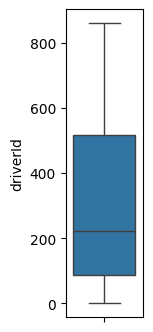

In [102]:
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(driver['driverId'])

<AxesSubplot: ylabel='driverId'>

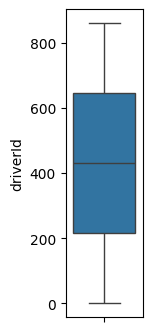

In [103]:
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(drivers['driverId'])

penggunaan metode IQR pada kolom numerik yang mana saya gunakan pada kolom points, osition, dan wins

In [104]:
# Check for outliers using the IQR method on numerical columns
Q1 = driver[['points', 'position', 'wins']].quantile(0.25)
Q3 = driver[['points', 'position', 'wins']].quantile(0.75)
IQR = Q3 - Q1
driver.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


mendeteksi outlier pada kolom points, positioans, dan wins

In [105]:
outliers = ((driver[['points', 'position', 'wins']] < (Q1 - 1.5 * IQR)) | 
            (driver[['points', 'position', 'wins']] > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers in the dataset: \n{outliers}")
driver.head()

Outliers in the dataset: 
points      4824
position    1863
wins        4115
dtype: int64


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


2. Normalisasi/standarisasi kolom numerik

melakukan standarisasi pada kolom points, position, dan wins menggunakan StandarScale.
Standarisasi ini mengubah data agar setiap kolom memiliki mean 0 dan standar deviasi 1, sehingga skala data menjadi seragam. Prosesnya melibatkan dua langkah: menghitung rata-rata dan standar deviasi dengan fungsi fit(), lalu mengubah nilai kolom dengan transform().

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
# Step 2: Normalization/Standardization of numerical columns
scaler = StandardScaler()
driver[['points', 'position', 'wins']] = scaler.fit_transform(driver[['points', 'position', 'wins']])
driver.head(30)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,-0.110514,-1.149907,1,0.709539
1,2,18,2,-0.164227,-1.088673,2,-0.266543
2,3,18,3,-0.217941,-1.027439,3,-0.266543
3,4,18,4,-0.244797,-0.966206,4,-0.266543
4,5,18,5,-0.271654,-0.904972,5,-0.266543
5,6,18,6,-0.298511,-0.843738,6,-0.266543
6,7,18,7,-0.325367,-0.782504,7,-0.266543
7,8,18,8,-0.352224,-0.721270,8,-0.266543
8,9,19,1,-0.003087,-1.149907,1,0.709539
9,10,19,2,-0.083657,-1.027439,3,-0.266543


3. Encoding kolom kategorikal

Kode ini mengubah teks dalam kolom positionText menjadi nilai numerik (kategori) yang lebih mudah diproses oleh model machine learning atau analisis lainnya. Setiap nilai teks diberi kode unik dalam kolom baru positionText_encoded.

In [108]:
# Step 3: Encoding categorical columns (positionText)
driver['positionText_encoded'] = driver['positionText'].astype('category').cat.codes
driver.head(30)

,driverStandingsId,raceId,driverId,points,position,positionText,wins,positionText_encoded
0,1,18,1,-0.110514,-1.149907,1,0.709539,0
1,2,18,2,-0.164227,-1.088673,2,-0.266543,20
2,3,18,3,-0.217941,-1.027439,3,-0.266543,31
3,4,18,4,-0.244797,-0.966206,4,-0.266543,42
4,5,18,5,-0.271654,-0.904972,5,-0.266543,53
5,6,18,6,-0.298511,-0.843738,6,-0.266543,64
6,7,18,7,-0.325367,-0.782504,7,-0.266543,75
7,8,18,8,-0.352224,-0.721270,8,-0.266543,86
8,9,19,1,-0.003087,-1.149907,1,0.709539,0
9,10,19,2,-0.083657,-1.027439,3,-0.266543,31


4. Feature engineering

Kode ini menghitung rasio performa untuk setiap entitas berdasarkan poin yang dimiliki. Rumus ini memastikan nilai selalu antara 0 dan 1, dengan performa yang lebih tinggi menghasilkan rasio yang lebih dekat ke 1.

In [109]:
# Step 4: Feature Engineering - Create a new feature: Performance Ratio (points/wins, handling zero wins)
driver['performance_ratio'] = driver['points'] / (driver['points'] + 1)
driver.head(30)

,driverStandingsId,raceId,driverId,points,position,positionText,wins,positionText_encoded,performance_ratio
0,1,18,1,-0.110514,-1.149907,1,0.709539,0,-0.124244
1,2,18,2,-0.164227,-1.088673,2,-0.266543,20,-0.196497
2,3,18,3,-0.217941,-1.027439,3,-0.266543,31,-0.278675
3,4,18,4,-0.244797,-0.966206,4,-0.266543,42,-0.324148
4,5,18,5,-0.271654,-0.904972,5,-0.266543,53,-0.372974
5,6,18,6,-0.298511,-0.843738,6,-0.266543,64,-0.425538
6,7,18,7,-0.325367,-0.782504,7,-0.266543,75,-0.482288
7,8,18,8,-0.352224,-0.721270,8,-0.266543,86,-0.543744
8,9,19,1,-0.003087,-1.149907,1,0.709539,0,-0.003096
9,10,19,2,-0.083657,-1.027439,3,-0.266543,31,-0.091294


5. Splitting data ke dalam data training & data testing

membuat variabel x sebagai data raining, dan y sebagai data testing

In [110]:
# Step 5: Splitting data into training and testing sets
# Dropping unnecessary columns for model training
X = driver.drop(columns=['driverStandingsId', 'positionText', 'positionText_encoded'])
y = driver['position']
driver.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,positionText_encoded,performance_ratio
0,1,18,1,-0.110514,-1.149907,1,0.709539,0,-0.124244
1,2,18,2,-0.164227,-1.088673,2,-0.266543,20,-0.196497
2,3,18,3,-0.217941,-1.027439,3,-0.266543,31,-0.278675
3,4,18,4,-0.244797,-0.966206,4,-0.266543,42,-0.324148
4,5,18,5,-0.271654,-0.904972,5,-0.266543,53,-0.372974


In [111]:
# Subset feature dan target
X = driver.iloc[:,:-1]  # Feature (semua kolom kecuali kolom terakhir)
y = driver.iloc[:,-1]   # Target (kolom terakhir)

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi hasil split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (27676, 8)
Shape of X_test: (6919, 8)
Shape of y_train: (27676,)
Shape of y_test: (6919,)
